<a href="https://colab.research.google.com/github/RemixDuan/Dissertation/blob/main/Dissertation_Ran.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Background**

Any Manufacturing Company is a medium-sized manufacturing company that produces electronic components. They have a wide range of products and maintain an inventory of raw materials, work-in-progress (WIP), and finished goods. The company has been experiencing issues with inventory management, including stockouts, excess inventory, and increased carrying costs. The management team wants to conduct an inventory analysis to identify areas for improvement and optimize their inventory management practices.

# Import Datasets

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

# Define path of dataset (uploaded on the Google Drive)
base_path = '/content/drive/MyDrive/archive'

# Load dataset
prices = pd.read_csv('/content/drive/MyDrive/archive/2017PurchasePricesDec.csv')
beg_inv = pd.read_csv('/content/drive/MyDrive/archive/BegInvFINAL12312016.csv')
end_inv = pd.read_csv('/content/drive/MyDrive/archive/EndInvFINAL12312016.csv')
invoice = pd.read_csv('/content/drive/MyDrive/archive/InvoicePurchases12312016.csv')
purchases = pd.read_csv('/content/drive/MyDrive/archive/PurchasesFINAL12312016.csv')
sales = pd.read_csv('/content/drive/MyDrive/archive/SalesFINAL12312016.csv')

##Price

In [ ]:
prices.head()

,Brand,Description,Price,Size,Volume,Classification,PurchasePrice,VendorNumber,VendorName
0,58,Gekkeikan Black & Gold Sake,12.99,750mL,750,1,9.28,8320,SHAW ROSS INT L IMP LTD
1,62,Herradura Silver Tequila,36.99,750mL,750,1,28.67,1128,BROWN-FORMAN CORP
2,63,Herradura Reposado Tequila,38.99,750mL,750,1,30.46,1128,BROWN-FORMAN CORP
3,72,No. 3 London Dry Gin,34.99,750mL,750,1,26.11,9165,ULTRA BEVERAGE COMPANY LLP
4,75,Three Olives Tomato Vodka,14.99,750mL,750,1,10.94,7245,PROXIMO SPIRITS INC.


##Beginning Inventory

In [ ]:
beg_inv.head()

,InventoryId,Store,City,Brand,Description,Size,onHand,Price,startDate
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,8,12.99,2016-01-01
1,1_HARDERSFIELD_60,1,HARDERSFIELD,60,Canadian Club 1858 VAP,750mL,7,10.99,2016-01-01
2,1_HARDERSFIELD_62,1,HARDERSFIELD,62,Herradura Silver Tequila,750mL,6,36.99,2016-01-01
3,1_HARDERSFIELD_63,1,HARDERSFIELD,63,Herradura Reposado Tequila,750mL,3,38.99,2016-01-01
4,1_HARDERSFIELD_72,1,HARDERSFIELD,72,No. 3 London Dry Gin,750mL,6,34.99,2016-01-01


##Ending Inventory

In [ ]:
end_inv.head()

,InventoryId,Store,City,Brand,Description,Size,onHand,Price,endDate
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,11,12.99,2016-12-31
1,1_HARDERSFIELD_62,1,HARDERSFIELD,62,Herradura Silver Tequila,750mL,7,36.99,2016-12-31
2,1_HARDERSFIELD_63,1,HARDERSFIELD,63,Herradura Reposado Tequila,750mL,7,38.99,2016-12-31
3,1_HARDERSFIELD_72,1,HARDERSFIELD,72,No. 3 London Dry Gin,750mL,4,34.99,2016-12-31
4,1_HARDERSFIELD_75,1,HARDERSFIELD,75,Three Olives Tomato Vodka,750mL,7,14.99,2016-12-31


##Invoice

In [ ]:
invoice.head()

,VendorNumber,VendorName,InvoiceDate,PONumber,PODate,PayDate,Quantity,Dollars,Freight,Approval
0,105,ALTAMAR BRANDS LLC,2016-01-04,8124,2015-12-21,2016-02-16,6,214.26,3.47,NaN
1,4466,AMERICAN VINTAGE BEVERAGE,2016-01-07,8137,2015-12-22,2016-02-21,15,140.55,8.57,NaN
2,388,ATLANTIC IMPORTING COMPANY,2016-01-09,8169,2015-12-24,2016-02-16,5,106.60,4.61,NaN
3,480,BACARDI USA INC,2016-01-12,8106,2015-12-20,2016-02-05,10100,137483.78,2935.20,NaN
4,516,BANFI PRODUCTS CORP,2016-01-07,8170,2015-12-24,2016-02-12,1935,15527.25,429.20,NaN


##Purchases

In [ ]:
purchases.head()

,InventoryId,Store,Brand,Description,Size,VendorNumber,VendorName,PONumber,PODate,ReceivingDate,InvoiceDate,PayDate,PurchasePrice,Quantity,Dollars,Classification
0,69_MOUNTMEND_8412,69,8412,Tequila Ocho Plata Fresno,750mL,105,ALTAMAR BRANDS LLC,8124,2015-12-21,2016-01-02,2016-01-04,2016-02-16,35.71,6,214.26,1
1,30_CULCHETH_5255,30,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-01,2016-01-07,2016-02-21,9.35,4,37.40,1
2,34_PITMERDEN_5215,34,5215,TGI Fridays Long Island Iced,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-02,2016-01-07,2016-02-21,9.41,5,47.05,1
3,1_HARDERSFIELD_5255,1,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-01,2016-01-07,2016-02-21,9.35,6,56.10,1
4,76_DONCASTER_2034,76,2034,Glendalough Double Barrel,750mL,388,ATLANTIC IMPORTING COMPANY,8169,2015-12-24,2016-01-02,2016-01-09,2016-02-16,21.32,5,106.60,1


##Sales

In [ ]:
sales.head()

,InventoryId,Store,Brand,Description,Size,SalesQuantity,SalesDollars,SalesPrice,SalesDate,Volume,Classification,ExciseTax,VendorNo,VendorName
0,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,1/1/2016,750,1,0.79,12546,JIM BEAM BRANDS COMPANY
1,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,2,32.98,16.49,1/2/2016,750,1,1.57,12546,JIM BEAM BRANDS COMPANY
2,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,1/3/2016,750,1,0.79,12546,JIM BEAM BRANDS COMPANY
3,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,14.49,14.49,1/8/2016,750,1,0.79,12546,JIM BEAM BRANDS COMPANY
4,1_HARDERSFIELD_1005,1,1005,Maker's Mark Combo Pack,375mL 2 Pk,2,69.98,34.99,1/9/2016,375,1,0.79,12546,JIM BEAM BRANDS COMPANY


#Data Preprocessing

###Checking for missing values in each dataset

In [ ]:
datasets = [prices, beg_inv, end_inv, invoice, purchases, sales]
dataset_names = ["prices", "beg_inv", "end_inv", "invoice", "purchases", "sales"]

for name, data in zip(dataset_names, datasets):
    missing_values = data.isnull().sum()
    non_zero_missing_values = missing_values[missing_values > 0]

    if not non_zero_missing_values.empty:
        print(f"\nMissing values in {name}:")
        print(non_zero_missing_values)


Missing values in prices:
Description    1
Size           1
Volume         1
dtype: int64

Missing values in end_inv:
City    1284
dtype: int64

Missing values in invoice:
Approval    5169
dtype: int64

Missing values in purchases:
Size    3
dtype: int64


##Handling missing values in each dataset

In [ ]:
# Handling missing values for prices dataset
cols_to_check = ['Description', 'Size', 'Volume']
for col in cols_to_check:
    prices = prices[prices[col].notna()]

# Handling missing values for end_inv dataset
if end_inv['Store'].nunique() == end_inv['City'].nunique():
    city_store_mapping = end_inv[['Store', 'City']].drop_duplicates().set_index('Store').to_dict()['City']
    end_inv['City'] = end_inv['City'].fillna(end_inv['Store'].map(city_store_mapping))
else:
    end_inv['City'].fillna('Unknown', inplace=True)

# Handling missing values for invoice dataset
invoice['Approval'].fillna('Pending', inplace=True)

# Handling missing values for purchases dataset
purchases = purchases[purchases['Size'].notna()]

datasets = [purchases, beg_inv, end_inv, purchases, purchases, sales]
dataset_names = ["prices", "beg_inv", "end_inv", "invoice", "purchases", "sales"]

for name, data in zip(dataset_names, datasets):
    missing_values = data.isnull().sum()
    non_zero_missing_values = missing_values[missing_values > 0]

    if not non_zero_missing_values.empty:
        print(f"\nMissing values in {name}:")
        print(non_zero_missing_values)
    else:
        print(f"\nNo missing values in {name}.")


No missing values in prices.

No missing values in beg_inv.

No missing values in end_inv.

No missing values in invoice.

No missing values in purchases.

No missing values in sales.


#Exploratory Data Analysis

##Descriptive Statistics

In [ ]:
sales.describe()  # 提供数据帧的描述性统计，包括均值、标准差等

,Store,Brand,SalesQuantity,SalesDollars,SalesPrice,Volume,Classification,ExciseTax,VendorNo
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,4.008063e+01,1.216959e+04,2.337619e+00,3.160420e+01,1.543162e+01,9.500280e+02,1.416550e+00,1.326847e+00,6.995043e+03
std,2.435739e+01,1.241921e+04,3.511492e+00,6.570249e+01,1.404967e+01,7.142708e+02,4.929872e-01,3.407898e+00,8.426736e+03
min,1.000000e+00,5.800000e+01,1.000000e+00,4.900000e-01,4.900000e-01,5.000000e+01,1.000000e+00,1.000000e-02,2.000000e+00
25%,1.500000e+01,3.680000e+03,1.000000e+00,1.099000e+01,8.990000e+00,7.500000e+02,1.000000e+00,1.600000e-01,3.252000e+03
50%,3.900000e+01,6.296000e+03,1.000000e+00,1.799000e+01,1.299000e+01,7.500000e+02,1.000000e+00,6.800000e-01,4.425000e+03
75%,6.400000e+01,1.795400e+04,2.000000e+00,3.199000e+01,1.899000e+01,1.500000e+03,2.000000e+00,1.570000e+00,9.552000e+03
max,7.900000e+01,9.008900e+04,4.320000e+02,1.327997e+04,4.999990e+03,2.000000e+04,2.000000e+00,3.785200e+02,1.733570e+05


In [ ]:
descriptive_stats = sales.describe()
descriptive_stats.to_csv("descriptive_statistics.csv")

##Distribution Analysis

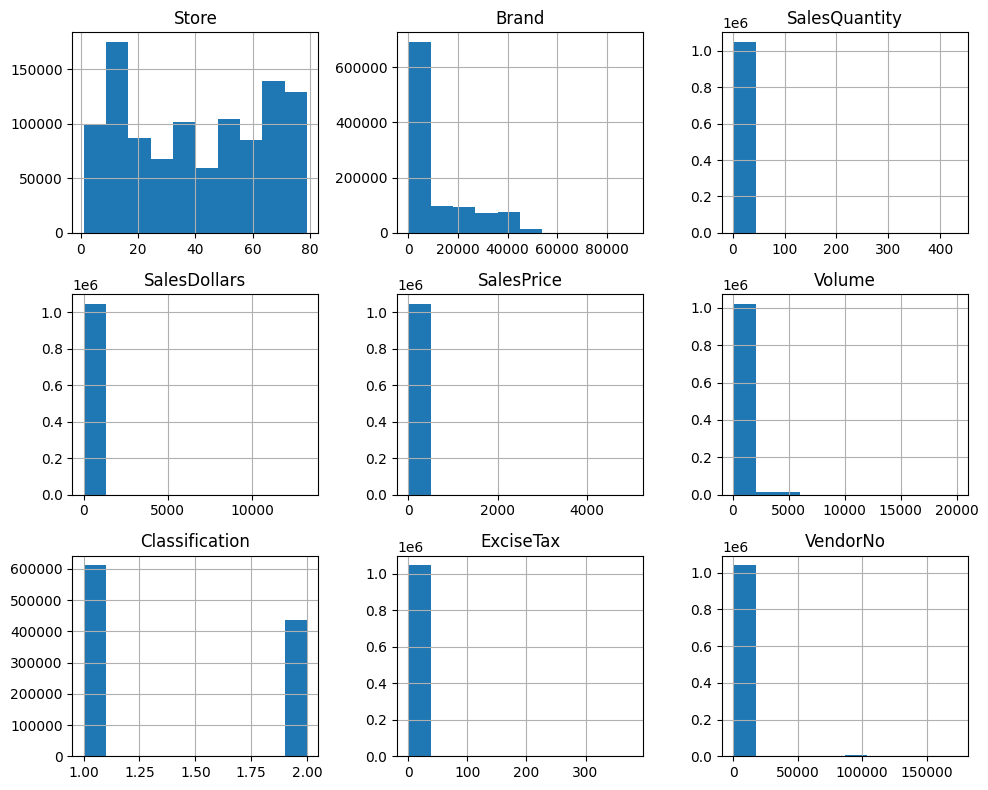

In [ ]:
import matplotlib.pyplot as plt
# Create subplots for each column
sales.hist(figsize=(10, 8))

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

##Correlation Analysis

In [ ]:
import matplotlib.pyplot as plt
numeric_columns=sales.dtypes[sales.dtypes == "float64"].index.values.tolist()

corr = sales[numeric_columns].corr()
corr.style.background_gradient(cmap='coolwarm').format(precision=2)

,SalesDollars,SalesPrice,ExciseTax
SalesDollars,1.00,0.34,0.67
SalesPrice,0.34,1.00,0.12
ExciseTax,0.67,0.12,1.00


Error in callback <function _draw_all_if_interactive at 0x7f08e1a831c0> (for post_execute):


KeyboardInterrupt: 

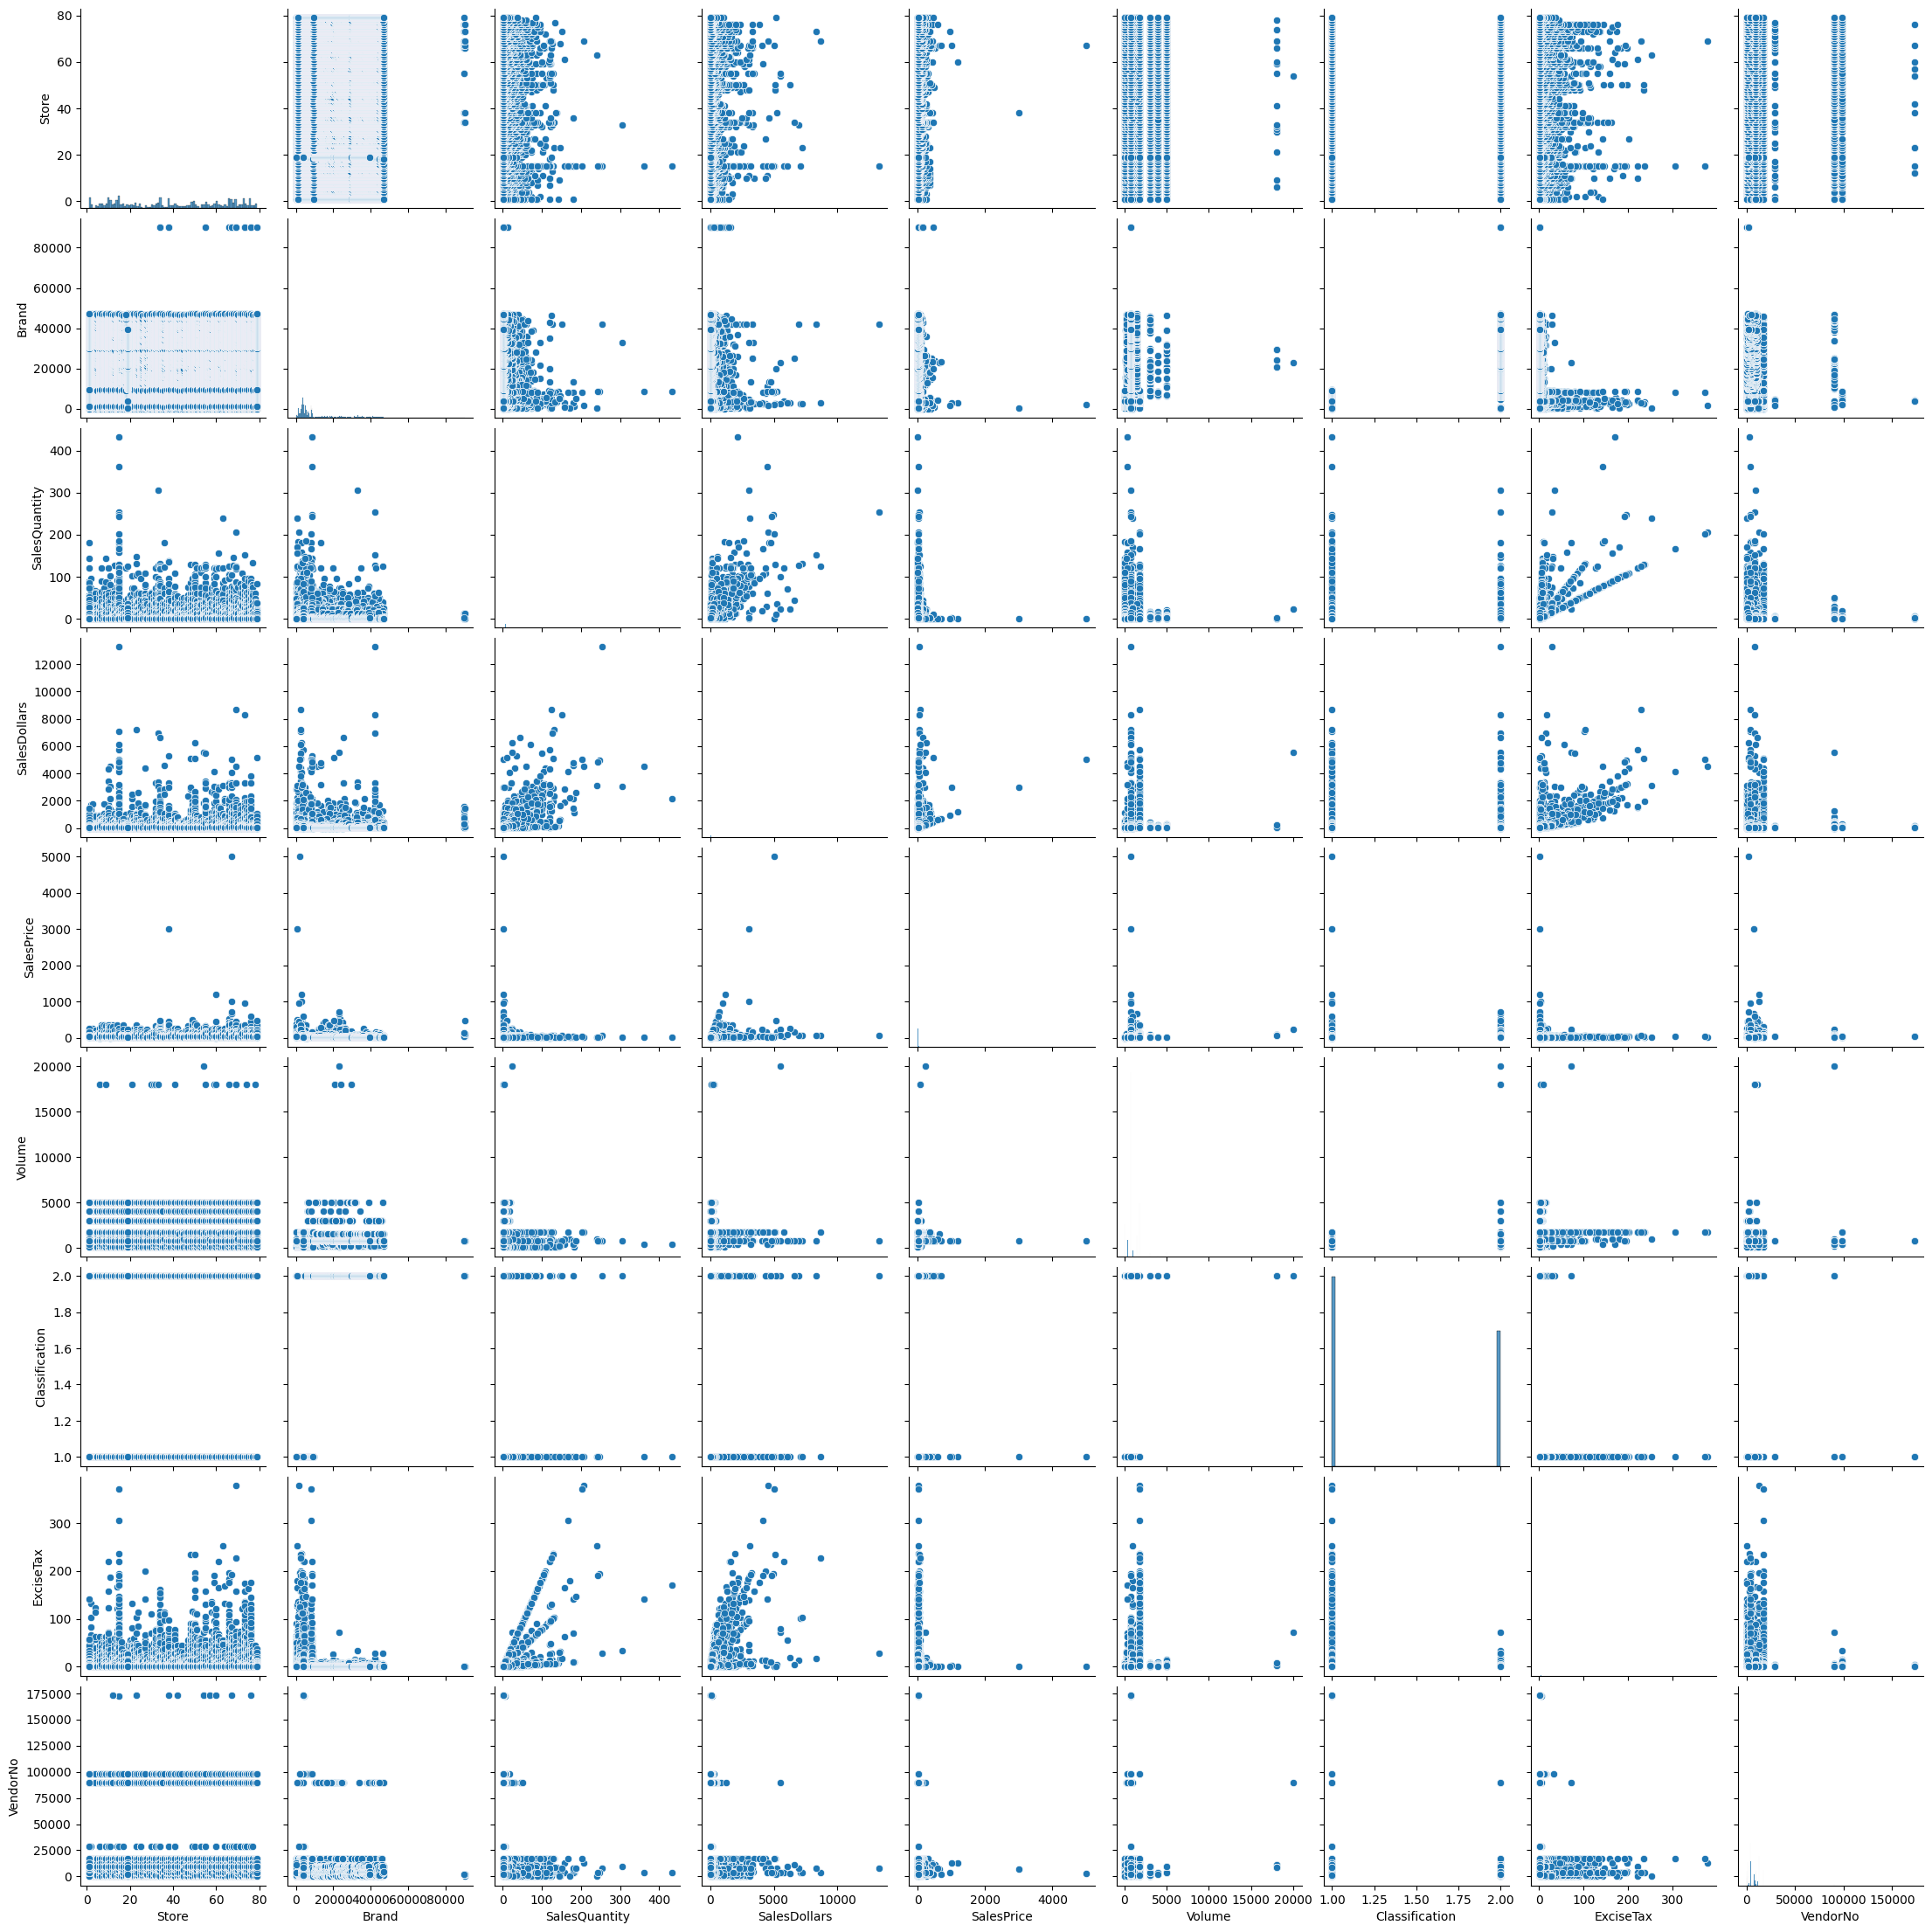

In [ ]:
#import seaborn as sns
#sns.pairplot(sales)

#Feature Engineering

In [ ]:
from datetime import datetime
sales_quantity_dollars = sales.groupby("SalesDate", as_index=False).agg({"SalesQuantity": "sum", 'SalesDollars': 'sum'})

# 将日期字符串转换为日期对象
sales_quantity_dollars['SalesDate'] = pd.to_datetime(sales_quantity_dollars['SalesDate'])

# 按日期排序
sales_quantity_dollars = sales_quantity_dollars.sort_values(by="SalesDate").reset_index(drop=True)
sales_quantity_dollars

,SalesDate,SalesQuantity,SalesDollars
0,2016-01-01,49911,687880.01
1,2016-01-02,93114,1303610.64
2,2016-01-03,53037,709085.36
3,2016-01-04,41341,499567.87
4,2016-01-05,40831,496719.05
5,2016-01-06,51358,660150.82
6,2016-01-07,59792,776881.62
7,2016-01-08,97389,1336517.75
8,2016-01-09,101690,1428520.90
9,2016-01-10,46146,611492.80


In [ ]:
# Get informtaion about the data:
sales_quantity_dollars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   SalesDate      60 non-null     datetime64[ns]
 1   SalesQuantity  60 non-null     int64         
 2   SalesDollars   60 non-null     float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 1.5 KB


In [ ]:
# 将日期转换为数值（将日期转为时间戳或天数）
sales_quantity_dollars['DateNumeric'] = sales_quantity_dollars['SalesDate'].map(datetime.toordinal)

In [ ]:
# Get informtaion about the data:
sales_quantity_dollars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   SalesDate      60 non-null     datetime64[ns]
 1   SalesQuantity  60 non-null     int64         
 2   SalesDollars   60 non-null     float64       
 3   DateNumeric    60 non-null     int64         
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 2.0 KB


#Demand Forecasting


In [ ]:
# split data into training and test
from sklearn.model_selection  import train_test_split

# Create training and test sets
X = sales_quantity_dollars[['SalesDollars', 'DateNumeric']]
Y = sales_quantity_dollars['SalesQuantity']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=42)

# print the shapes to check everything is OK
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(48, 2)
(12, 2)
(48,)
(12,)


###Linear Regression

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# fit the LR model to the training data
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

# 使用测试集进行预测
Y_pred = lin_model.predict(X_test)

# calculate RMSE (root mean square error) and R^2 (predictive power)
rmse = (np.sqrt(mean_squared_error(Y_test, Y_pred)))
r2 = r2_score(Y_test, Y_pred)

# print the performance metrics
print(f' {lin_model} - Model performance')
print("--------------------------------------")
print(f'RMSE is {rmse}')
print(f'R2 score is {r2}')

 LinearRegression() - Model performance
--------------------------------------
RMSE is 1614.2680079262148
R2 score is 0.9943525472735117


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


    SalesDate  SalesQuantity     Forecast
0  2016-01-01        49911.0  7919.645176
1  2016-01-02        93114.0  7786.130903
2  2016-01-03        53037.0  7652.616630
3  2016-01-04        41341.0  7519.102356
4  2016-01-05        40831.0  7385.588083
..        ...            ...          ...
56 2016-02-26        13416.0   442.845870
57 2016-02-27        13011.0   309.331596
58 2016-02-28         6866.0   175.817323
59 2016-02-29         5905.0    42.303050
60 2016-03-01            NaN   -91.211224

[61 rows x 3 columns]


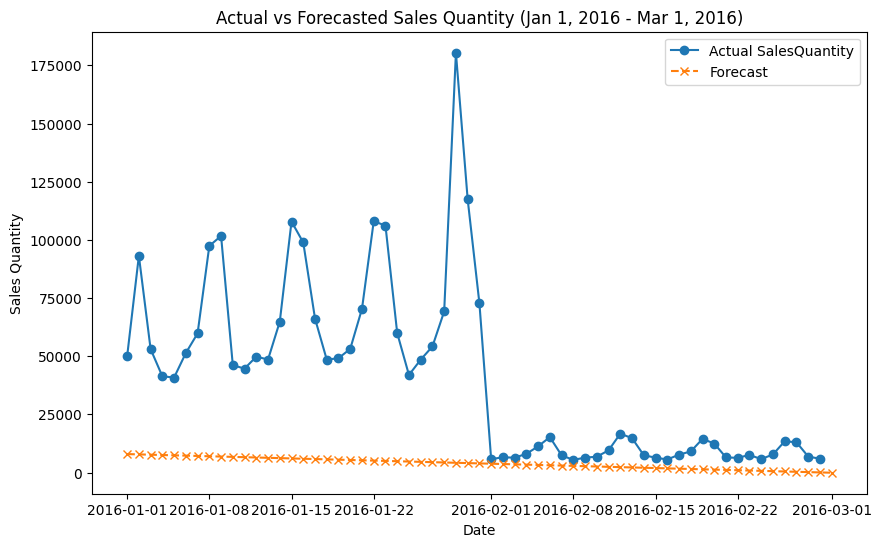

In [ ]:
from datetime import datetime

# 生成预测期的日期范围
future_dates = pd.date_range(start='2016-01-01', end='2016-03-01')

# 将这些日期转换为 DateNumeric 格式
future_dates_numeric = future_dates.map(datetime.toordinal).values.reshape(-1, 1)
future_sales_dollars = np.zeros_like(future_dates_numeric)  # 使用零填充

# 组合未来特征
future_X = np.hstack([future_sales_dollars, future_dates_numeric])

# 使用模型预测未来的销售数量
future_forecast = lin_model.predict(future_X)

# 创建包含日期、预测值的数据框
forecast_df = pd.DataFrame({
    'SalesDate': future_dates,
    'Forecast': future_forecast
})

# 从原始数据中筛选实际值
actual_values = sales_quantity_dollars[sales_quantity_dollars['SalesDate'].isin(future_dates)][['SalesDate', 'SalesQuantity']]

# 合并实际值和预测值
result_df = pd.merge(actual_values, forecast_df, on='SalesDate', how='outer')

# 打印结果表格，展示日期、实际值、预测值的对比
print(result_df[['SalesDate', 'SalesQuantity', 'Forecast']])

# 可视化结果对比
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(result_df['SalesDate'], result_df['SalesQuantity'], label='Actual SalesQuantity', marker='o')
plt.plot(result_df['SalesDate'], result_df['Forecast'], label='Forecast', linestyle='--', marker='x')
plt.xlabel('Date')
plt.ylabel('Sales Quantity')
plt.title('Actual vs Forecasted Sales Quantity (Jan 1, 2016 - Mar 1, 2016)')
plt.legend()
plt.show()

###Desicion Tree Regression

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

# 定义参数网格
param_grid = {
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'max_features': [None, 'sqrt', 'log2']
}

# 创建决策树回归模型
tree_model = DecisionTreeRegressor(random_state=42)

# 使用 GridSearchCV 进行超参数优化
grid_search = GridSearchCV(estimator=tree_model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search.fit(X_train, Y_train)

# 打印最佳参数
print("Best parameters found: ", grid_search.best_params_)

# 使用最佳参数训练的模型进行预测
best_tree_model = grid_search.best_estimator_  # 这是经过训练的最佳模型
Y_pred_best_tree = best_tree_model.predict(X_test)

# 计算 RMSE 和 R^2
rmse_best_tree = np.sqrt(mean_squared_error(Y_test, Y_pred_best_tree))
r2_best_tree = r2_score(Y_test, Y_pred_best_tree)

# 打印模型性能指标
print(f'{best_tree_model} - Optimized Model performance')
print("--------------------------------------")
print(f'RMSE is {rmse_best_tree}')
print(f'R2 score is {r2_best_tree}')

Best parameters found:  {'max_depth': 10, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
DecisionTreeRegressor(max_depth=10, random_state=42) - Optimized Model performance
--------------------------------------
RMSE is 1913.1595376932544
R2 score is 0.9920676165657352


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


    SalesDate  SalesQuantity  Forecast
0  2016-01-01        49911.0   40831.0
1  2016-01-02        93114.0   40831.0
2  2016-01-03        53037.0   40831.0
3  2016-01-04        41341.0   40831.0
4  2016-01-05        40831.0   40831.0
..        ...            ...       ...
56 2016-02-26        13416.0    5425.0
57 2016-02-27        13011.0    5425.0
58 2016-02-28         6866.0    5425.0
59 2016-02-29         5905.0    5425.0
60 2016-03-01            NaN    5425.0

[61 rows x 3 columns]


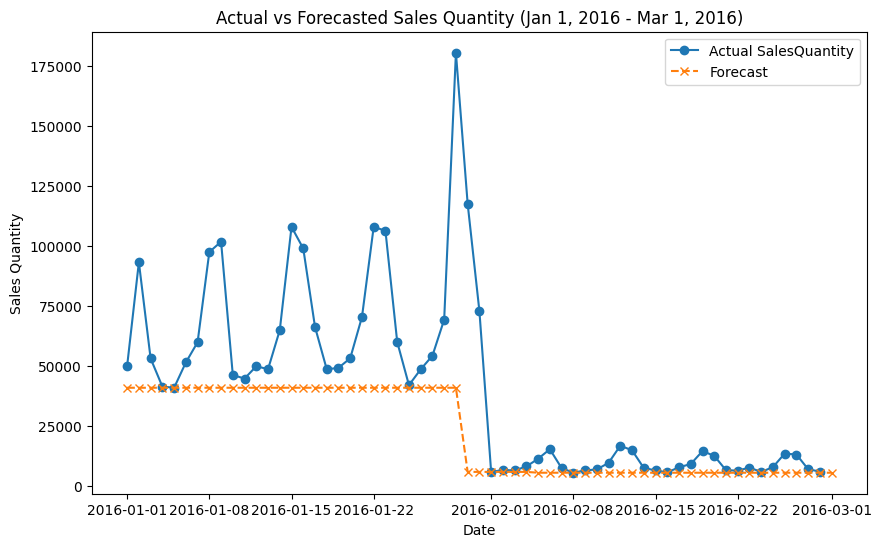

In [ ]:
from datetime import datetime

# 生成预测期的日期范围
future_dates = pd.date_range(start='2016-01-01', end='2016-03-01')

# 将这些日期转换为 DateNumeric 格式
future_dates_numeric = future_dates.map(datetime.toordinal).values.reshape(-1, 1)
future_sales_dollars = np.zeros_like(future_dates_numeric)  # 使用零填充

# 组合未来特征
future_X = np.hstack([future_sales_dollars, future_dates_numeric])

# 使用模型预测未来的销售数量
future_forecast = best_tree_model.predict(future_X)

# 创建包含日期、预测值的数据框
forecast_df = pd.DataFrame({
    'SalesDate': future_dates,
    'Forecast': future_forecast
})

# 从原始数据中筛选实际值
actual_values = sales_quantity_dollars[sales_quantity_dollars['SalesDate'].isin(future_dates)][['SalesDate', 'SalesQuantity']]

# 合并实际值和预测值
result_df = pd.merge(actual_values, forecast_df, on='SalesDate', how='outer')

# 打印结果表格，展示日期、实际值、预测值的对比
print(result_df[['SalesDate', 'SalesQuantity', 'Forecast']])

# 可视化结果对比
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(result_df['SalesDate'], result_df['SalesQuantity'], label='Actual SalesQuantity', marker='o')
plt.plot(result_df['SalesDate'], result_df['Forecast'], label='Forecast', linestyle='--', marker='x')
plt.xlabel('Date')
plt.ylabel('Sales Quantity')
plt.title('Actual vs Forecasted Sales Quantity (Jan 1, 2016 - Mar 1, 2016)')
plt.legend()
plt.show()

###Random Forest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# 更新后的参数网格
param_grid = {
    'n_estimators': [100],  # 森林中树的数量
    'max_depth': [None, 10, 20, 30],  # 每棵树的最大深度
    'min_samples_split': [2, 5, 10],  # 分裂节点所需的最小样本数
    'min_samples_leaf': [1, 2, 4],    # 叶子节点的最小样本数
    'max_features': ['sqrt', 'log2']  # 在每次分裂时考虑的特征数
}

# 重新进行超参数优化
rf_model = RandomForestRegressor(random_state=42)

grid_search_rf = GridSearchCV(estimator=rf_model,
                              param_grid=param_grid,
                              cv=5,
                              n_jobs=-1,
                              scoring='neg_mean_squared_error')

grid_search_rf.fit(X_train, Y_train)

# 打印最佳参数
print("Best parameters found: ", grid_search_rf.best_params_)

# 使用最佳模型进行预测
best_rf_model = grid_search_rf.best_estimator_
Y_pred_best_rf = best_rf_model.predict(X_test)

# 计算 RMSE 和 R^2
rmse_best_rf = np.sqrt(mean_squared_error(Y_test, Y_pred_best_rf))
r2_best_rf = r2_score(Y_test, Y_pred_best_rf)

# 打印模型性能指标
print(f'{best_rf_model} - Optimized Model performance')
print("--------------------------------------")
print(f'RMSE is {rmse_best_rf}')
print(f'R2 score is {r2_best_rf}')

Best parameters found:  {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
RandomForestRegressor(max_features='sqrt', random_state=42) - Optimized Model performance
--------------------------------------
RMSE is 1832.5919748519207
R2 score is 0.9927216508500749


    SalesDate  SalesQuantity  Forecast
0  2016-01-01        49911.0  34098.45
1  2016-01-02        93114.0  34098.45
2  2016-01-03        53037.0  32774.08
3  2016-01-04        41341.0  31539.29
4  2016-01-05        40831.0  30354.05
..        ...            ...       ...
56 2016-02-26        13416.0   6990.79
57 2016-02-27        13011.0   6912.04
58 2016-02-28         6866.0   6548.57
59 2016-02-29         5905.0   6361.38
60 2016-03-01            NaN   6361.38

[61 rows x 3 columns]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


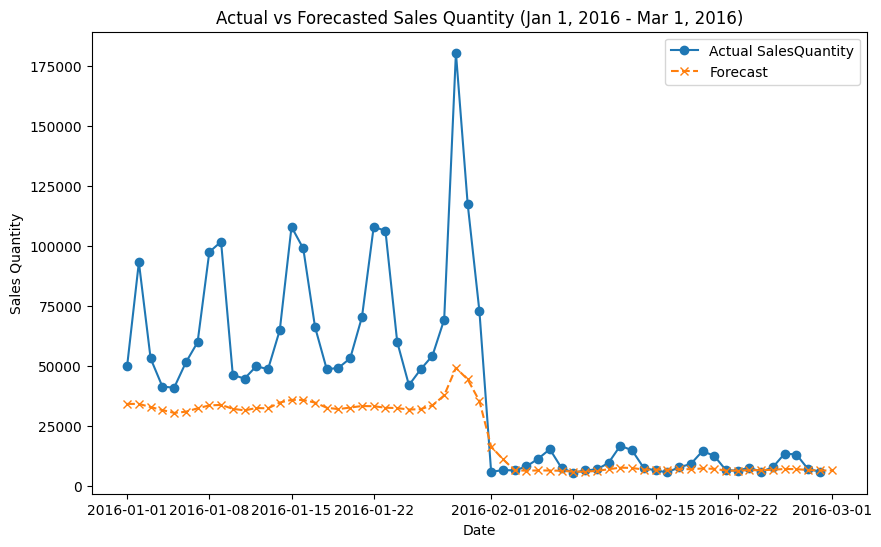

In [ ]:
from datetime import datetime

# 生成预测期的日期范围
future_dates = pd.date_range(start='2016-01-01', end='2016-03-01')

# 将这些日期转换为 DateNumeric 格式
future_dates_numeric = future_dates.map(datetime.toordinal).values.reshape(-1, 1)
future_sales_dollars = np.zeros_like(future_dates_numeric)  # 使用零填充

# 组合未来特征
future_X = np.hstack([future_sales_dollars, future_dates_numeric])

# 使用模型预测未来的销售数量
future_forecast = best_rf_model.predict(future_X)

# 创建包含日期、预测值的数据框
forecast_df = pd.DataFrame({
    'SalesDate': future_dates,
    'Forecast': future_forecast
})

# 从原始数据中筛选实际值
actual_values = sales_quantity_dollars[sales_quantity_dollars['SalesDate'].isin(future_dates)][['SalesDate', 'SalesQuantity']]

# 合并实际值和预测值
result_df = pd.merge(actual_values, forecast_df, on='SalesDate', how='outer')

# 打印结果表格，展示日期、实际值、预测值的对比
print(result_df[['SalesDate', 'SalesQuantity', 'Forecast']])

# 可视化结果对比
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(result_df['SalesDate'], result_df['SalesQuantity'], label='Actual SalesQuantity', marker='o')
plt.plot(result_df['SalesDate'], result_df['Forecast'], label='Forecast', linestyle='--', marker='x')
plt.xlabel('Date')
plt.ylabel('Sales Quantity')
plt.title('Actual vs Forecasted Sales Quantity (Jan 1, 2016 - Mar 1, 2016)')
plt.legend()
plt.show()

#Inventory Management


##Inventory Objectives

In [ ]:
# 对相同 Brand 和 Description 汇总 onHand
# Beginning Inventory
beg_inv_grouped = beg_inv.groupby(['Brand', 'Description'], as_index=False).agg({'onHand': 'sum'})

# Ending Inventory
end_inv_grouped = end_inv.groupby(['Brand', 'Description'], as_index=False).agg({'onHand': 'sum'})

# Top 5 products (Highest onHand) for Beginning Inventory
top_5_beg_inv = beg_inv_grouped.sort_values(by='onHand', ascending=False).head(5)

# Bottom 5 products (Lowest onHand) for Beginning Inventory
bottom_5_beg_inv = beg_inv_grouped.sort_values(by='onHand').head(5)

# Top 5 products (Highest onHand) for Ending Inventory
top_5_end_inv = end_inv_grouped.sort_values(by='onHand', ascending=False).head(5)

# Bottom 5 products (Lowest onHand) for Ending Inventory
bottom_5_end_inv = end_inv_grouped.sort_values(by='onHand').head(5)

print("Top 5 products for Beginning Inventory:")
print(top_5_beg_inv)

print("\nBottom 5 products for Beginning Inventory:")
print(bottom_5_beg_inv)

print("\nTop 5 products for Ending Inventory:")
print(top_5_end_inv)

print("\nBottom 5 products for Ending Inventory:")
print(bottom_5_end_inv)

Top 5 products for Beginning Inventory:
      Brand                 Description  onHand
1748   4261      Capt Morgan Spiced Rum   15499
2635   8068            Absolut 80 Proof   15341
1580   3876           Smirnoff 80 Proof   14829
1389   3545             Ketel One Vodka   14499
2474   6879  Maurice's Mentholated Mint   14180

Bottom 5 products for Beginning Inventory:
      Brand                   Description  onHand
963    2715  Teeling Single Grain Whiskey       0
1115   2963  Bruichladdich The Laddie Ten       0
4644  19620       Ch Vrai Canon Bouche 10       0
1944   4912  Bacardi MultiFlavored 5 Pack       0
5242  21506    Wrath Wines Chard Ex Anima       0

Top 5 products for Ending Inventory:
      Brand              Description  onHand
1507   3545          Ketel One Vodka   16770
1876   4261   Capt Morgan Spiced Rum   16769
2837   8111        Smirnoff 80 Proof   16242
2817   8068         Absolut 80 Proof   15608
496    1233  Jack Daniels No 7 Black   15047

Bottom 5 products f

In [ ]:
top_5_beg_inv.to_csv("top_5_beg_inv.csv")
bottom_5_beg_inv.to_csv("bottom_5_beg_inv.csv")

top_5_end_inv.to_csv("top_5_end_inv.csv")
bottom_5_end_inv.to_csv("bottom_5_end_inv.csv")

##Average Daily Unit Sales

In [ ]:
sales_velocity = (
    sales.groupby(["Brand", "Description"]).agg({"SalesQuantity": "sum"}).reset_index()
)
days = (
    pd.to_datetime(sales["SalesDate"]).max() - pd.to_datetime(sales["SalesDate"]).min()
).days
sales_velocity["mean_daily_sales"] = sales_velocity["SalesQuantity"] / days
mean_daily_sales = sales_velocity.set_index("Brand")["mean_daily_sales"]
display(mean_daily_sales.to_frame().T, mean_daily_sales.describe().to_frame().T)

Brand,58,60,61,62,63,72,75,77,79,82,...,90014,90025,90080,90081,90082,90084,90085,90086,90087,90089
mean_daily_sales,4.881356,2.101695,0.40678,2.745763,2.220339,0.322034,0.050847,15.389831,7.050847,0.050847,...,0.237288,0.20339,0.322034,0.118644,0.050847,0.033898,0.033898,0.016949,0.016949,0.457627


,count,mean,std,min,25%,50%,75%,max
mean_daily_sales,7658.0,5.425077,17.203688,0.016949,0.169492,0.830508,4.033898,483.79661


##Average Lead Time

In [ ]:
purchases["lead_time"] = (
    pd.to_datetime(purchases["ReceivingDate"]) - pd.to_datetime(purchases["PODate"])
).dt.days
lead_time_brand = purchases.groupby("Brand").agg({"lead_time": "mean"})
display(lead_time_brand.T, lead_time_brand.describe().T)

Brand,58,60,61,62,63,70,72,75,77,79,...,90080,90085,90086,90087,90088,90089,90090,90604,90609,90631
lead_time,7.758389,7.659794,8.115385,7.33157,7.324427,7.333333,8.636364,7.0,7.292162,7.270161,...,12.0,8.0,9.0,4.8,3.5,7.333333,4.5,7.384615,10.363636,9.21374


,count,mean,std,min,25%,50%,75%,max
lead_time,10663.0,7.81831,1.222808,3.0,7.277778,7.705882,8.294118,14.0


##Safety Stock

In [ ]:
max_sales_brand = sales.groupby("Brand").agg({"SalesQuantity": "max"})
safety_stock = (
    max_sales_brand["SalesQuantity"]
    - sales_velocity.set_index("Brand")["mean_daily_sales"]
)
display(safety_stock.to_frame().T, safety_stock.describe().to_frame().T)
#notice there are negatives to fix this problem we will just set them to 0
safety_stock[safety_stock < 0] = 0

Brand,58,60,61,62,63,72,75,77,79,82,...,90014,90025,90080,90081,90082,90084,90085,90086,90087,90089
0,2.118644,0.898305,11.59322,0.254237,1.779661,2.677966,0.949153,-7.389831,-2.050847,2.949153,...,11.762712,9.79661,7.677966,5.881356,1.949153,0.966102,1.966102,0.983051,0.983051,11.542373


,count,mean,std,min,25%,50%,75%,max
0,7658.0,6.12794,16.949081,-356.79661,1.508475,3.762712,9.525424,407.966102


##Reorder Point Analysis

In [ ]:
from math import ceil

RPA = (lead_time_brand['lead_time'] * mean_daily_sales) + safety_stock
RPA.name = "ReorderPoint"
RPA.dropna(inplace=True)
RPA = RPA.apply(lambda x: ceil(x)).to_frame()
display(RPA.T,RPA.describe().T)

Brand,58,60,61,62,63,72,75,77,79,82,...,90010,90011,90012,90013,90014,90080,90085,90086,90087,90089
ReorderPoint,40,17,15,21,19,6,2,113,52,4,...,3,14,8,15,14,12,3,2,2,15


,count,mean,std,min,25%,50%,75%,max
ReorderPoint,7146.0,52.479429,136.521855,2.0,6.0,16.0,46.0,3687.0
